In [1]:
%matplotlib inline

In [6]:
import pathlib

In [2]:
from matplotlib import pyplot as plt

In [3]:
import geopandas as gpd

In [4]:
import pandas as pd

In [8]:
HOME = pathlib.Path.home()

In [10]:
root_path = HOME.joinpath('research/Smart_Ideas/data/shapefiles/application_cases/Apple_and_Pears') 

In [11]:
shapes = gpd.read_file(root_path.joinpath('Hawkes_Bay_Orchard_Bubbles.shp'))

### check the CRS 

In [12]:
shapes.crs

<Projected CRS: EPSG:2193>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: New Zealand - onshore
- bounds: (166.37, -47.33, 178.63, -34.1)
Coordinate Operation:
- name: New Zealand Transverse Mercator 2000
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### convert to CRS 4242 (NZGD49)

In [13]:
shapes = shapes.to_crs('epsg:4272')

In [15]:
shapes.crs

<Geographic 2D CRS: EPSG:4272>
Name: NZGD49
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: New Zealand - onshore and nearshore
- bounds: (165.87, -47.65, 179.27, -33.89)
Datum: New Zealand Geodetic Datum 1949
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

<AxesSubplot:>

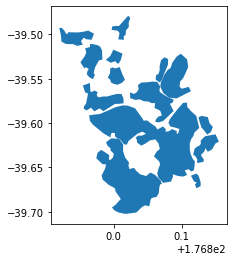

In [59]:
shapes.plot()

### get the bounds 

In [27]:
bounds = shapes.bounds

In [31]:
bounds 

,minx,miny,maxx,maxy
0,176.797184,-39.506053,176.824380,-39.479504
1,176.720638,-39.512931,176.771445,-39.492609
2,176.751542,-39.550290,176.783716,-39.510794
3,176.788706,-39.533142,176.813197,-39.517178
4,176.791618,-39.556768,176.816692,-39.536810
5,176.755127,-39.586743,176.814706,-39.554813
6,176.823925,-39.599308,176.888142,-39.553185
7,176.861739,-39.554277,176.879936,-39.525764
8,176.868430,-39.572143,176.913365,-39.521737
9,176.764280,-39.667383,176.925486,-39.576942


In [32]:
minx, maxx = bounds.minx.min(), bounds.maxx.max()

In [33]:
miny, maxy = bounds.miny.min(), bounds.maxy.max()

### get the coordinates of the bounds 

In [34]:
coords = [minx, maxx, miny, maxy]

In [35]:
coords

[176.72063773007181,
 176.95420452987926,
 -39.702445392381016,
 -39.47950444875658]

In [46]:
d = {}
d['lonmin'] = coords[0]
d['lonmax'] = coords[1]
d['latmin'] = coords[2]
d['latmax'] = coords[3]

In [48]:
import xarray as xr

In [50]:
xr.Dataset(d)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    lonmin   float64 176.7
    lonmax   float64 177.0
    latmin   float64 -39.7
    latmax   float64 -39.48

### casts into a Dataset then saves to disk 

In [51]:
dset = xr.Dataset(d)

In [52]:
dset.to_netcdf(root_path.joinpath('Apple_and_Pears_bounding_box.nc'))

### plots with basemap 

#### convert the CRS to Web Mercator 

In [60]:
df = shapes.to_crs(epsg=3857)

### plot with a basemap (using contextily)

In [63]:
import contextily as ctx

<ipython-input-73-56dd08566037>:3: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  ctx.add_basemap(ax, url=ctx.providers.Esri.WorldStreetMap)


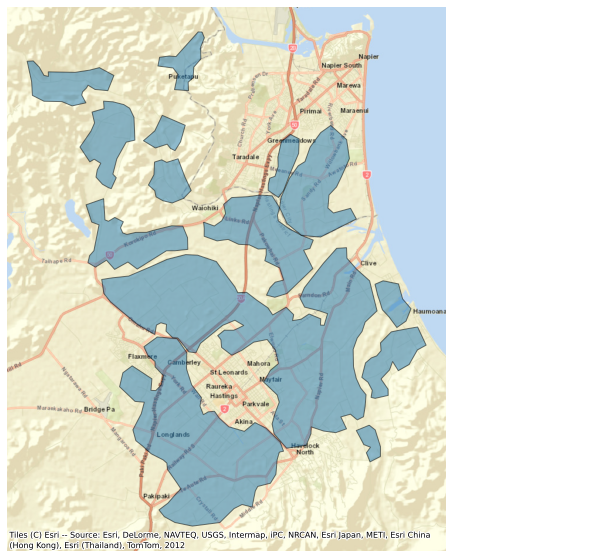

In [73]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
# ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
ctx.add_basemap(ax, url=ctx.providers.Esri.WorldStreetMap)
ax.set_axis_off()

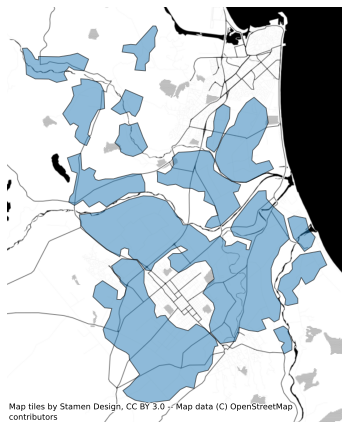

In [92]:
f, ax = plt.subplots(figsize=(6,10))
df.plot(alpha=0.5, edgecolor='k',ax=ax)
# ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerBackground)
ax.set_axis_off()

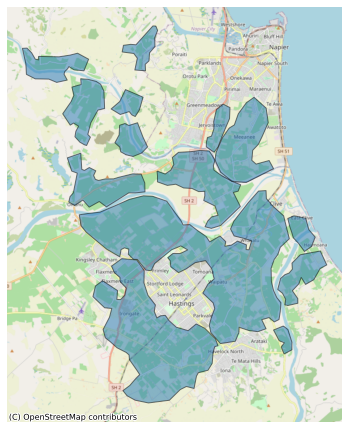

In [94]:
f, ax = plt.subplots(figsize=(6,10))
df.plot(alpha=0.5, edgecolor='k',ax=ax)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
f.savefig('./basemap_plot_contextily.png', dpi=200, bbox_inches='tight')